In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("Social_Network_Ads.csv")

In [74]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [76]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [78]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [80]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: ylabel='EstimatedSalary'>

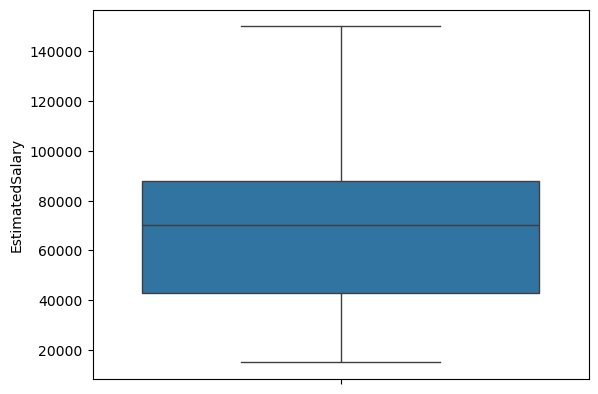

In [82]:
sns.boxplot(df["EstimatedSalary"])

<Axes: ylabel='Age'>

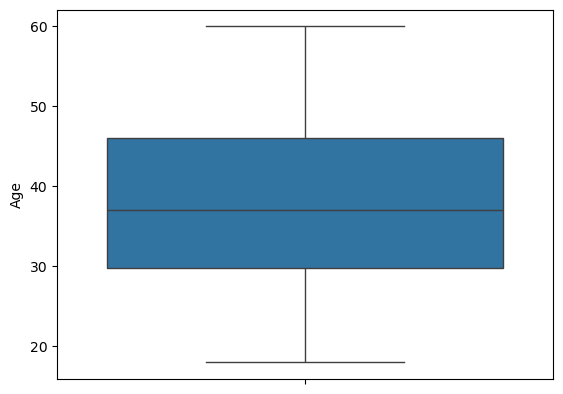

In [84]:
sns.boxplot(df["Age"])

<Axes: xlabel='Gender', ylabel='count'>

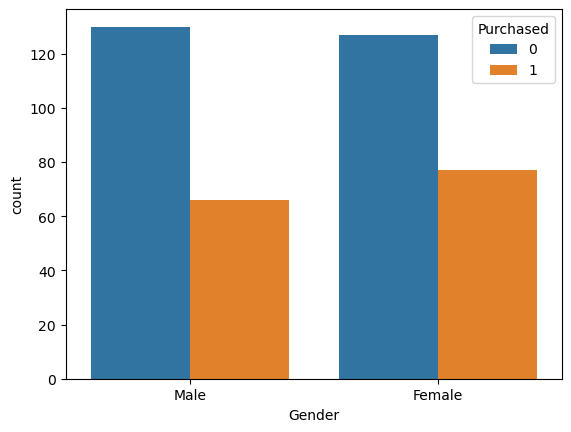

In [86]:
sns.countplot(df, x=df["Gender"], hue="Purchased")

<Axes: >

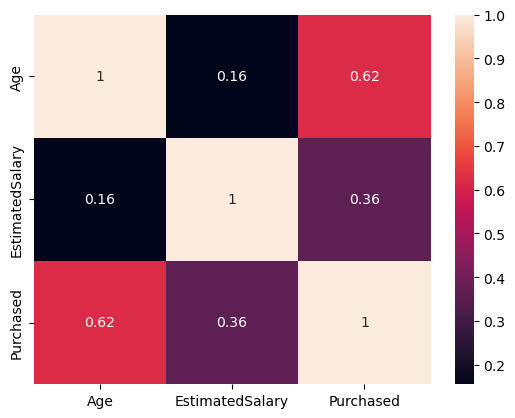

In [88]:
newdf = df.drop(["Gender", "User ID"], axis=1)
sns.heatmap(newdf.corr(), annot=True)

## Encoding

In [91]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Female" else 0)
df.Gender.value_counts()

Gender
1    204
0    196
Name: count, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.asarray(df.drop(["User ID", "Purchased"], axis=1))
y = np.asarray(df["Purchased"])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=(0.3))

In [95]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc*100, "%")

Accuracy:  87.5 %


## Metrices

In [106]:
tp = ( (y_pred == 1) & (y_test == 1)).sum()
tn = ( (y_pred == 0) & (y_test == 0)).sum()
fp = ( (y_pred == 1) & (y_test == 0)).sum()
fn = ( (y_pred == 0) & (y_test == 1)).sum()

In [120]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy*100)

error = 1 - accuracy
print("Error: ", error*100)

Accuracy:  87.5
Error:  12.5


In [122]:
precision = tp / (tp + fp)
print("Precision: ", precision*100)

Precision:  88.23529411764706


In [126]:
recall = tp/(tp+fn)
print("Recall: ", recall*100)

Recall:  73.17073170731707


In [128]:
f1 = 2*(precision*recall)/(precision + recall)
print("f1 score: ", f1)

f1 score:  0.8
